# Assignment group 2: Network and exploratory data analysis

## Module A _(65 pts)_ Exploring averages, sentiment, and time series
In this section we're going to experiment with the word-based text sentiment data generated by a research project documented in the following publication:

- https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752#pone.0026752.s001

These data are packaged with the assignment in the following directory:

- `./data/Data_Set_S1.txt`

Here's the caption describing the data, from their paper:

> Data from Mechanical Turk study. labMT 1.0 = language assessment by Mechanical Turk 1.0. In the supplementary tab-delimited file named Data Set S1, we provide our set of 10,222 words, their average happiness evaluations according to users on Mechanical Turk, and other information as described below. Please cite the present paper when using this word set. Within papers, we suggest using the abbreviation labMT 1.0 when referencing this data set. The words are ordered according to average happiness (descending), and the file contains eight columns: (1) word, (2) rank, (3) average happiness (50 user evalutions), (4) standard deviation of happiness, (5) Twitter rank, (6) Google Books rank, (7) New York Times rank, (8) Music Lyrics rank. The last four columns correspond to the ranking of a word by frequency of occurrence in the top 5000 words for the specified corpus. A double dash ‘–’ indicates a word was not found in the most frequent 5000 words for a corpus. Please see the main paper for more information regarding this data set.

Note, the paper refers to the scorings as 'happiness' values, but these are also referred to as 'valence', which is a measure of poistive/negative 'affect', or 'sentiment'.

__A1.__ _(2 pts)_ To start, load the dataset with `pandas` into a dataframe and print its `.head()` and `tail()`. Do the lines output make sense in the context of the description?

\[Hint. Since the folks who put these data together put a few lines (3) of descriptive text&mdash;not data&mdash;use the `skiprows` argument in `pd.read_csv()` to start parsing/loading into the dataframe at the appropriate line. Just be sure to keep the header!!

In [416]:
import pandas as pd

words_data = pd.read_csv(
    filepath_or_buffer = 'data/Data_Set_S1.txt',
    sep='\t',
    header=0,
    skiprows = 3)

print(words_data.head(), '\n\n', words_data.tail())

        word  happiness_rank  happiness_average  happiness_standard_deviation  \
0   laughter               1               8.50                        0.9313   
1  happiness               2               8.44                        0.9723   
2       love               3               8.42                        1.1082   
3      happy               4               8.30                        0.9949   
4    laughed               5               8.26                        1.1572   

  twitter_rank google_rank nyt_rank lyrics_rank  
0         3600          --       --        1728  
1         1853        2458       --        1230  
2           25         317      328          23  
3           65        1372     1313         375  
4         3334        3542       --        2332   

             word  happiness_rank  happiness_average  \
10217     murder           10218               1.48   
10218  terrorism           10219               1.48   
10219       rape           10220             

__A2.__ _(3 pts)_ Review the data with descriptive statistics. In particular, create a histogram of the `'happiness_average'` column, labeling axes clearly, and plot/print out the locations of the mean and median in this same picture as `'red'` and `'blue'` vertical lines respectively. In the response box below indicate if you believe these data are skewed (the center should be `5`, i.e., neutral), and if so indicate the direction of skew (high or low) and how these information justify that view.

**_Response._** 
Both the mean and the median are above 5; that is, the data are skewed high.
In other words, 5 is neutral on a scale from 0 to 10, so the mean and median being above 5 means the direction of skew is high.

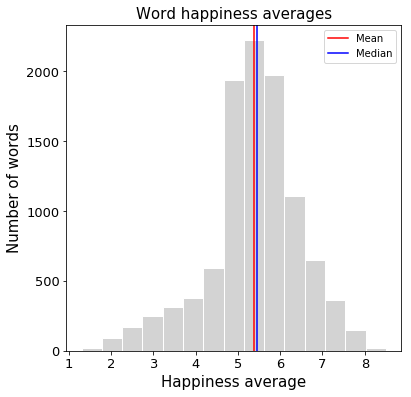

In [417]:
import re
from matplotlib import pyplot as plt

#create figure & set dimensions
hist_fig = plt.figure(figsize = (6,6))

#plot histogram
_ = plt.hist(words_data['happiness_average'],
             bins = 15,
             color = 'lightgray', edgecolor = 'w')

#plot mean and median
_ = plt.axvline(words_data['happiness_average'].mean(),
               color = 'red', label = 'Mean')
_ = plt.axvline(words_data['happiness_average'].median(),
               color = 'blue', label = 'Median')

#modify figure properties
_ = plt.title('Word happiness averages', fontsize = 15)
_ = plt.tick_params(labelsize = 13)
_ = plt.ylabel('Number of words', fontsize = 15)
_ = plt.xlabel('Happiness average', fontsize = 15)
_ = plt.legend(fontsize = 10)

__A3.__ _(3 pts)_ The `'happiness_average'` column was created as an average of 50 survey responses and is supplementally associated to the standard deviations from these 50-respondant cohorts. Make a scatter plot of the `'happiness_standard_deviation'` (vertical) against the `'happiness_average'` (horizontal) column. Again, be sure to clearly label axes and adjust any arguments to make this picture as clear and interpretable as possible.

Discuss any relationship you visually observe between these columns in the response box below. Since the `y` variable is a standard deviation, do you think there's a particular range (of the `x`/horizontal variable, `'happiness_average'`) over which the data are specifically less reliable, according to this picture? If so, include some discussion over why you think this may the case, considering the neutral criterion for 'stop word removal' that we follow in part __A10__.

\[Hint. Be sure to utilize the `color` and `alpha` arguments to highlight variations in point density.\]

___Response.___
Below `happiness_average` ~= 5, the points are more spread out. Above this, the points start to clump together. Below 5, there are more words with high standard deviations relative to their averages (less reliable data).

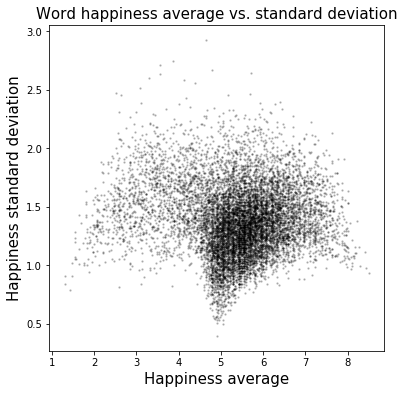

In [418]:
#create figure & set dimensions
scat_fig = plt.figure(figsize = (6,6))

#make scatter plot
_ = plt.scatter(
    words_data['happiness_average'],
    words_data['happiness_standard_deviation'],
    color = 'k',
    s = 2,
    alpha = .2)

#modify figure properties
_ = plt.title('Word happiness average vs. standard deviation', fontsize = 15)
_ = plt.ylabel('Happiness standard deviation', fontsize = 15)
_ = plt.xlabel('Happiness average', fontsize = 15)

__A4.__ _(2 pts)_ One of the columns is labeled `'nyt_rank'`, which indicates the rank (by frequency) of each given word in a corpus of all New York Times (NYT) articles from the 20-year period, 1987&ndash;2007. This is provided because the ~10k words that constitute the data were, in part, drawn from this 20-year corpus of articles. Thus, the words in `./data/Data_Set_S1.txt` data are specially tuned for application to a corpus text drawn from the NYT.

So to match, frequencies are provided for the same ~10k words for each daily issue of the NYT in the 20-year corpus. These are contained in the file:

- `"./data/nyt.csv"`

which will available in the data directory after the compressed file is inflated, i.e., after unzipping from the command line in the data directory:

```
>>> unzip nyt.csv.zip
```

Load these data using `pandas`, store the `.transpose()`'d dataframe as `nyt`, and then set the dataframe's `.columns` attribute to the `'word'` column of the valence dataframe. Then, print the `.shape`, `'.head()`, and `'.tail()'` to confirm they are compatible with the valence data, e.g., for inner products. In the response box below, record the dimensions $m$ and $n$ as the number of times and words in the dataset (the matrix dimensions). 

Note: with these data, we're thinking about _time_ as the independent, '`x`' variable, so it's convenient to have the times along the rows, and words along the columns&mdash;this is the 'why' for the application of `.transpose()` from the shape of the `nyt` data on file.

**_Response._**
Matrix dimensions $(m,n) = (7475, 10222)$

In [419]:
#load nyt_data
nyt_data = pd.read_csv(
    filepath_or_buffer = 'data/nyt.csv',
    header=0)

#transpose nyt_data so that each column represents a word
#set column attribute to 'word' values from valence dataframe (words_data)
nyt = nyt_data.transpose()
nyt.columns = words_data['word']

#print some attributes
print(nyt.shape, '\n\n', nyt.head(), '\n\n', nyt.tail())

(7475, 10222) 

 word        laughter  happiness  love  happy  laughed  laugh  laughing  \
1987-01-01         0          0     6      9        0      3         1   
1987-01-02         0          2    20     12        0      0         2   
1987-01-03         0          0     5      3        0      0         0   
1987-01-04         7          1    44     19        1      9         3   
1987-01-05         0          0    11      1        1      1         1   

word        excellent  laughs  joy  ...  died  kill  killed  cancer  death  \
1987-01-01          2       0    9  ...    14     2      18      38     26   
1987-01-02          5       1    0  ...    19     7      27       1     24   
1987-01-03          2       0    2  ...    14     4      16       2     21   
1987-01-04         14       4    7  ...    30    14      38      33     60   
1987-01-05          4       2    1  ...    14     1      47      15     22   

word        murder  terrorism  rape  suicide  terrorist  
1987-01-01 

__A5.__ _(5 pts, total)_ While the valence values were detemined by survey and may be skewed, the histogram from __A2__ doesn't reflect the frequency with which the words were actually used. For this part, your job is to repeate the histogram picture, but with weighted values, including the computation of mean and median lines.

So, write a function that computes the mean and median as weighted quantities, according to the occurrence of words in the articles. So intuitively, if the most positive word (`'laughter'`, `happiness_average = 8.5`) appeared 100 times across the NYT, there would be 100 instances of the value 8.5 to incorporate into each of the mean and median calculations.

When this is complete, discuss any changing/stationary features of the centrality statistics and histogram that you observe as compared to the output in __A2__, using the response box below.

_Response._ 

- [x] __Weights.__ _(1/5 pts)_
To start, total the frequencies in the NYT data across time (collapsing rows) into a single vector: $\vec{F} = [F_1, \cdots, F_n]$ (use the `axis` argument in the `.sum()` method and name the resulting object `F`). Using this, record the total number of words in the entire dataset: `N = F.sum()`. Print `N` once calculated, below.

In [420]:
#total frequencies of each word across time (collapse rows)
F = nyt.sum(axis = 0)

#calculate total number of words in the dataset
N = F.sum()

print(N)

868729965


- [x] __Mean.__ _(1/5 pts)_
For the mean you'll have to use $\vec{F}$ in a sum formula that groups the contributions of words according to their $F_i$ weights:
$$
\overline{h} = \frac{\sum_{i=1}^nh_i\cdot F_i}{\sum_{i=1}^nF_i} = \frac{1}{N}\sum_{i=1}^nh_i\cdot F_i,
$$
Here, the $h_i$ indicate the valence values for the words, and the denominator $N = \sum_{i=1}^nF_i$ is equal to the total number of words that appeared in the dataset (as above). Print the mean once calculated, below.

In [421]:
import numpy as np

#calculate weighted mean
h = np.dot(words_data['happiness_average'], F) / N

print(h)

5.368698927128638


- [x] __Median.__ _(1/5 pts)_
While the above mean can be easily computed  via sums and dot products the 'weighted' median is more challenging. In particular, the median considers the middle-most word according to a sort from low to high by valence. 

Since we now have frequencies of occurrence for each word, we have to _cumulatively_ count up the frequencies in order of increasing (or decreasing) valence. The median will be the word/valence over which half&mdash;$N/2$&mdash;of the frequency in $\vec{F}$ accumulates.

The valence data are already sorted from high to low. But this is a special case&mdash;we're looking for the 50th percentile. So, we can take cumulative sums of `F` to identify the word for which $N/2$ accumulates. In particular, use the `.cumsum()` method on `F` to identify the median word/valence appearing at $N/2$. Print the median once calculated, below.

In [422]:
F_sum = np.cumsum(F)

print(F_sum.median())
print(N/2)

print(F_sum[0:2])
print(F[0:2])

#median_cumsum = F_sum.median()
#i = F_sum.index(median_cumsum)


343087564.0
434364982.5
word
laughter     10618
happiness    19595
dtype: int64
word
laughter     10618
happiness     8977
dtype: int64


- [x] __Histogram.__ _(1/5 pts)_
For the histogram, $\vec{F}$ can now be used as the value for the `weights` argument. Otherwise, you may reuse your histogram code from __A2__, including vertical lines at the centrality measures.

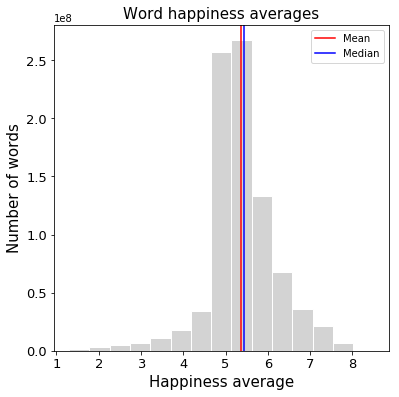

In [423]:
#create figure & set dimensions
hist_fig = plt.figure(figsize = (6,6))

#plot histogram
_ = plt.hist(words_data['happiness_average'],
             bins = 15,
             weights = F,
             color = 'lightgray', edgecolor = 'w')

#plot mean and median
_ = plt.axvline(h, color = 'red', label = 'Mean')
_ = plt.axvline(words_data['happiness_average'].median(),
               color = 'blue', label = 'Median')

#modify figure properties
_ = plt.title('Word happiness averages', fontsize = 15)
_ = plt.tick_params(labelsize = 13)
_ = plt.ylabel('Number of words', fontsize = 15)
_ = plt.xlabel('Happiness average', fontsize = 15)
_ = plt.legend(fontsize = 10)

__A6.__ _(2 pts)_ The NYT data are timeseries data, but how can we utilize the temporal information? To get started, modify `nyt`'s to contain parsed `datetime` objects, utilizing the `dateutil.parser.parse()` function. When this is done, print the first 10 elements of the index.

\[Hint: to get/modify the index in a dataframe utilize the `.index` attribute.\]

In [424]:
import datetime
from dateutil import parser


#to apply the parser.parse() method to the index of every row,
#first turn the index list into a Series, then use .apply(parser.parse)
#(parser must be a string or character stream, not an index)

nyt.index = pd.Series(nyt.index).apply(parser.parse)
print(nyt.index[0:10])

DatetimeIndex(['1987-01-01', '1987-01-02', '1987-01-03', '1987-01-04',
               '1987-01-05', '1987-01-06', '1987-01-07', '1987-01-08',
               '1987-01-09', '1987-01-10'],
              dtype='datetime64[ns]', freq=None)


__A7.__ _(3 pts)_ Throughout this assignment we're going to want to be able to standardize the columns of our time series. So, your job here is to write a function called `standardize(ts)` that accepts a time series dataframe `ts` (like `nyt`) as input, and outputs a timeseries of same shape, containing the standardized columns of `ts`.

For `nyt`, standardizing the columns will allow comparability words, since they occur at very different frequencies. So when `standardize()` processes `nyt`, the $i^\text{th}$ word at time $t$ should be transformed to: 
$$
\frac{f_{t,i} - \mu_T(f_i)}{\sigma_T(f_i)}
$$

When this is complete, store the application of `standarize()` to `nyt` as `word_series` and exhibit its `.head()`.

In [425]:
def standardize(ts):
    
    mean = np.mean(ts)
    stdev = np.std(ts)
    
    standardized_data = (ts - mean) / stdev
    
    return standardized_data
    
word_series = standardize(nyt)
print(word_series.head())

word        laughter  happiness      love     happy   laughed     laugh  \
1987-01-01 -0.683302  -0.538567 -0.765061 -0.220546 -0.841246  0.089350   
1987-01-02 -0.683302   0.358345 -0.282450  0.096855 -0.841246 -0.828079   
1987-01-03 -0.683302  -0.538567 -0.799533 -0.855349 -0.841246 -0.828079   
1987-01-04  2.683977  -0.090111  0.544882  0.837458 -0.328082  1.924207   
1987-01-05 -0.683302  -0.538567 -0.592700 -1.066950 -0.328082 -0.522269   

word        laughing  excellent    laughs       joy  ...      died      kill  \
1987-01-01 -0.336054  -0.569589 -0.598018  1.528850  ... -1.016927 -0.891953   
1987-01-02  0.144896  -0.063245  0.073080 -0.861644  ... -0.684887  0.097473   
1987-01-03 -0.817004  -0.569589 -0.598018 -0.330423  ... -1.016927 -0.496183   
1987-01-04  0.625846   1.455786  2.086375  0.997629  ...  0.045602  1.482671   
1987-01-05 -0.336054  -0.232026  0.744178 -0.596033  ... -1.016927 -1.089839   

word          killed    cancer     death    murder  terrorism      r

__A8.__ _(10 pts)_ Now write a function called `plot_series(ts, start, stop)` that plots the columns of a time series `ts`, like `word_series` (or `nyt`), as line plots of a range in time specified by strings `start` and `stop` in the format `yyyy-mm-dd`. Be sure to make your visualization as interpretable as possible, specifically utilizing both `label`s for columns and transparency of line color (`alpha`).

For development and testing, select just a few word-columns: `word_series[words]` (slicing out columns results in a smaller set of valid series) and a well-understood range of time (`start`/`stop`). In particular, use:

- `words = ['new'`, `'year'`, `"year's"`, `'two'`, `'eve'`, `'thousand']`
- `start = '1999-12-15'`
- `stop = '2000-01-15'` 

for development, and exhibit your code's output using these parameters.

When complete, comment in the response box below on the location of peaks, and be sure to discuss why you think the observed spike(s) exist.

\[Hint. to retrieve values in the temporal plotting range defined by `start` and `stop`, use boolean masks.\]

**_Response._**
The most easily esplained peaks are the two that occur on Christmas and New Year's Eve. There's a third significant peak on New Year's Day. Discussion of the New Year's holiday, and in particular the greeting "Happy New Year" (and variations), are common on these dates every year, so these peaks are no surprise. The words "two" and "thousand" are common on these days because of the dates we're observing (New Year's 2000). There are also peaks around December 19th, 1999, and on January 9th, 2000. These are less easily explained. The first may be due to excitement during the lead-up into the holiday season (about a week before Christmas), and the second may be due to the wind-down after the holiday (about a week after New Year's day).

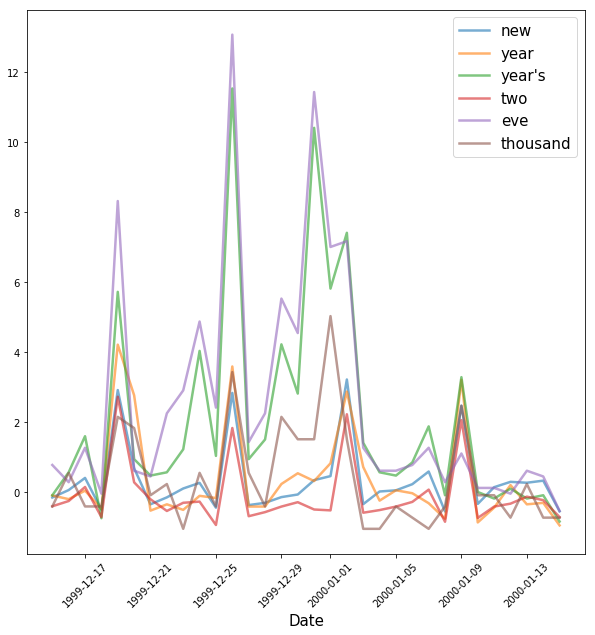

In [426]:
def plot_series(ts, start, stop):
    
    #create figure & set dimensions
    hist_fig = plt.figure(figsize = (10,10))
    
    #plot the data
    _ = plt.plot(ts.loc[start:stop], alpha = 0.6, linewidth = 2.5)
    
    #modify plot properties
    plt.tick_params(labelsize = 10)
    #_ = plt.title("Word frequency vs. time", fontsize = 20)
    #_ = plt.ylabel("Word frequency", fontsize = 15)
    _ = plt.xlabel("Date", fontsize = 15)
    _ = plt.xticks(rotation = 45)
    _ = plt.legend(ts.columns, fontsize = 15)
    
    
words = ['new', 'year', "year's", 'two', 'eve', 'thousand']
start = '1999-12-15'
stop = '2000-01-15'

plot_series(word_series[words], start, stop)

__A9.__ _(7 pts)_ One common aspect of time series' is the presence of 'uninteresting' trends (at least from the point of view of the desired analysis). Generally, de-trending can be done by characterizing a trend&mdash;a regularity desired for removal&mdash;and  removing it, either by subtraction or division. Right now, our interest will be focused on spikes that may represent events outside of an 'everyday routine', so we will be _de-trending weekly signatures_. 

So, create a function called `detrend_weekly(ts)` that takes a time series `ts`, computes the average day-of-week values for each column, and the divides column values them by their respective averages from the corresponding days of week. The function should `return` a dataframe the same shape as `ts`.

When this is complete, again, apply your code to just a few word-columns: `word_series[words]`. In partcular, use:

- `words = ['new'`, `'year'`, `"year's"`, `'two'`, `'eve'`, `'thousand']`

and pass the result, `detrend_weekly(word_series[words])` through `plot_series()` over the range of time defined by:

- `start = '1999-12-15'`
- `stop = '2000-01-15'`

Finally, comment in the markdown cell below as to any changes that occur when the weekly trend is removed. What do you think these changes tell you about the data, i.e., word frequencies in NYT articles? Do you think the issues for the different days of the week were generally of the same size?

\[Hint: Python support 'triple-index' slicing, for which the third index indicates a step-size for the slice, i.e, for a list `lst`, `lst[0:401:10]` will result in every `10`th value from index `0` to `400`, i.e., `[0, 10, 20, ..., 400]`.\]

**_Response._**
The plots for "new", "year", "two", and "thousand" flattened out, which indicates that these words were not used significantly more around the New Year's holiday than during the rest of the year. The plots for "year's" and "eve" maintained large peaks around Christmas and New Year's Eve/Day, which indicates that these words are used with unusually high frequency around the winter holidays (and especially on New Year's; this is the largest peak).

C:\Dev\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


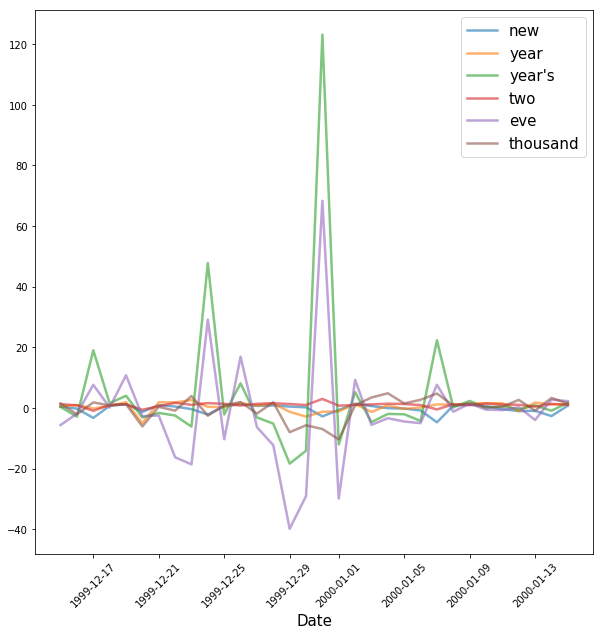

In [427]:
def detrend_weekly(ts):

    detrend_data = ts
    
    for i in range(0,7):
        day_avg = ts[i::7].mean(axis = 0)
        detrend_data[i::7] = ts[i::7] / day_avg
    
    return detrend_data
    

    
words = ['new', 'year', "year's", 'two', 'eve', 'thousand']
start = '1999-12-15'
stop = '2000-01-15'

detrend_weekly(word_series[words])
plot_series(detrend_weekly(word_series[words]), start, stop)

__A10.__ _(8 pts)_ Next up, your job is to produce a function called `avgs(ts, stop = 0)`, which produces a timeseries of average valence values for a times series, `ts`, e.g., the entire 20-year range of `nyt`. 

In particular, for a given day, $t$, the average daily value should be

$$
\overline{h}_t = \frac{ \sum_{i=1}^nh_i\cdot f_{t, i}}{\sum_{i=1}^nf_{t,i}},
$$

The argument `stop` indicates the size of a 'stop word window' (see the valence-data authors' paper to supplement details) of valence values for words to be omitted from the calculation. So, if `stop = 1` and the $i^\text{th}$ word has valence $h_i$ inside the window (i.e., $h_i\in [4,6]$), then $h_i\cdot f_{t, i}$ and $f_{t, i}$ should be excluded from the above sum's numerator and denominator, respectively.

When this is complete, store the output of this function applied to `nyt` `for` each value of `stop` in `range(4)` as a column in a new time series dataframe called `avgs_series` under the column names `'avg-'+str(stop)`. Then, display these new columns using your `plot_series()` function over a new range, defined by: 

- `start = "2000-01-01"`
- `stop = "2003-12-31"` 

and discuss any differences you observe between the four different series defined by the stop word windows in the response box below.

\[Hint: use `.dot()` products and `.sum()` methods on boolean masks of `ts`, slicing the non-stop words for fast calculation.] 

**_Response._**

When stop=0 and no mundane words are omitted from the analysis, the average happiness is just above neutral 5. This is in line with what we saw in our histogram earlier (data skews happier than neutral).

When stop=1 and stop=2, happiness averages are greater than the stop=0 line. But when stop=3, happiness averages are less than the stop=0 line. So the data skews happy, but the words farthest away from neutral are less happy than neutral.

They all show a marked drop in happiness around September 2001.

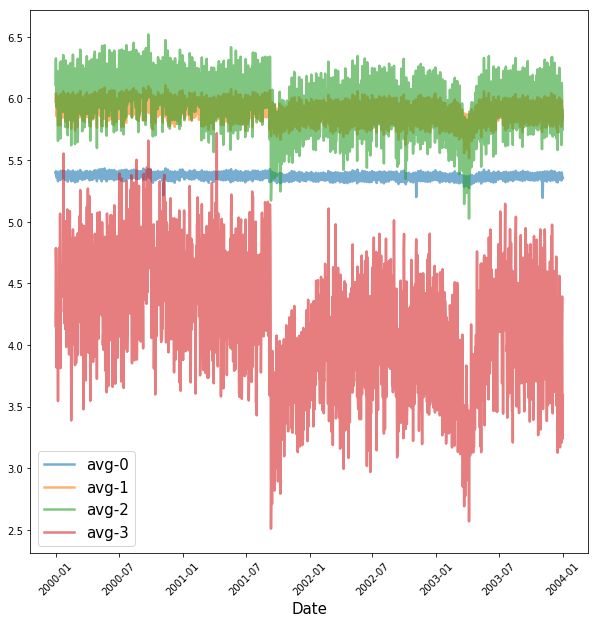

In [428]:
def avgs(ts, stop = 0):

    #create a boolean mask, get a list of included words
    boolean_filter = (words_data['happiness_average'] <= 5-stop) | (words_data['happiness_average'] >= 5+stop)      
    include_words = words_data.loc[boolean_filter, 'word'].to_list()
    
    #store filtered dataframes in variables for use in calculation
    f_keep = ts[include_words]
    h_keep = words_data['happiness_average'].loc[boolean_filter]
    
    #calculate average daily valence values
    return np.dot(f_keep, h_keep) / f_keep.sum(axis = 1)
  
    
avgs_series = pd.DataFrame()
for stop in range(4):
    avgs_series['avg-'+str(stop)] = avgs(nyt, stop)

    
start = "2000-01-01"
stop = "2003-12-31"    
plot_series(avgs_series, start, stop)

__A11.__ _(8 pts)_ One thing you might've noticed from the previous part was that the calculated averages were rather noisy, preventing us from observing long-term trends and big events. So, let's build a function called `smooth(ts, r = 1)` that takes a time series `ts` (e.g., `avgs_series`) and returns a same-shaped time series dataframe of _moving averages_ of the columns of your `series`.  

Averages are to be taken over the values in a 'window' of radius $r$ about a point in time $t$. In particular, the smoothed value at $t_\text{smooth}$ should be taken over all times $t$ for which 

$$t_\text{smooth} - r < t < t_\text{smooth} + r$$ 

For example, if we call the result `smooth_ts = smooth(ts, r)`, then the values should be:

```
smooth_ts.iloc[i,j] = np.mean(ts.iloc[i-r:(i+r)+1, j])
```

When complete, apply `smooth()` to `avgs_series`, using several values of `r`, and describe how the smoothing affects it in the response box below. To exhibit your code's function, select a value of `r` that you think smoothes the data to an interpretable state, call this `r_best` and then utilize the corresponding output in `plot_series()`, again over the range defined by: 

- `start = "2000-01-01"`
- `stop = "2003-12-31"`

to exemplify your discussion. 

__Important__: for the edge cases, i.e., when `i < r` or when  `i + r > series.shape[0]`, you'll have to take exta care on indexing to make sure your averages are taken over fewer values. This is the hardest component of this part of the assignment!

**_Response._**

I tried `r = 10`, `r = 100`, and `r = 1000` to see how the plot changes with increasing orders of magnitude of `r`. These three plots are shown below in the order `r_best = 100`, `r = 10`, `r = 1000`. The first plot below is the plot for my chosen `r_best = 100`. I chose `100` after comparing the three plots. With `r = 10`, there is still a lot of noise. With `r = 1000`, too much information is lost (the plot is too smooth and doesn't show detailed trends). The intermediate `r = 100` is a good balance; noise is eliminated, but trends are visible. 

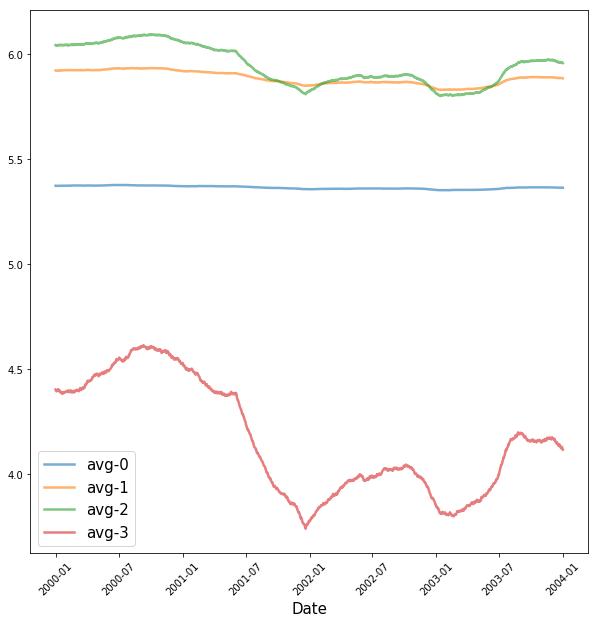

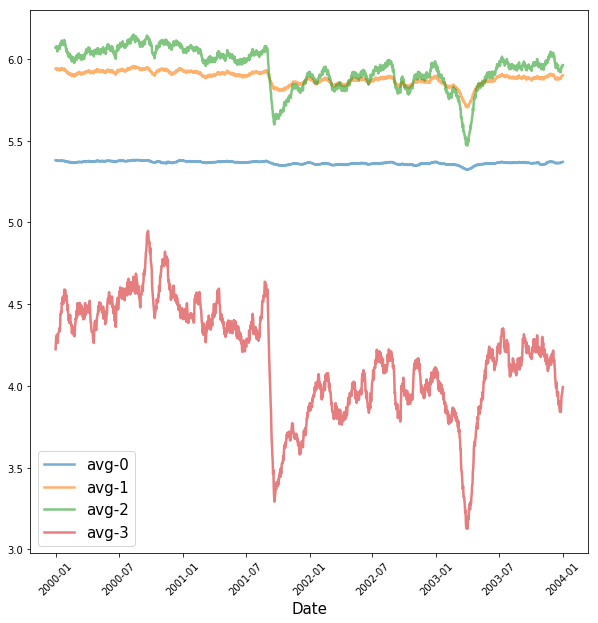

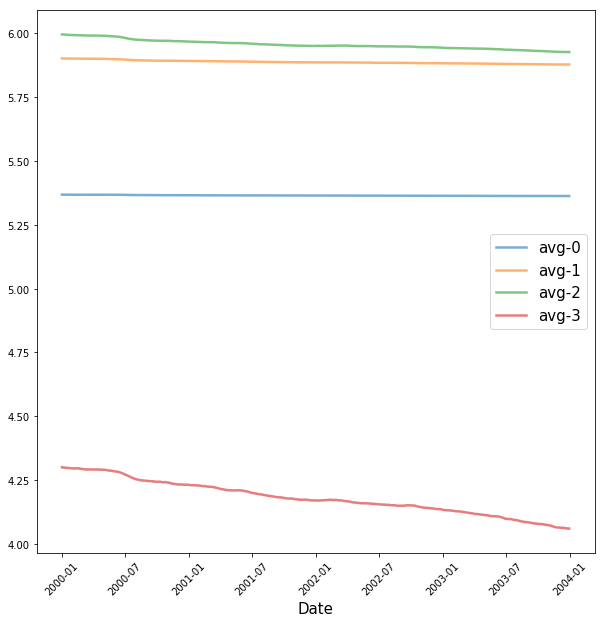

In [429]:
def smooth(ts, r):
    
    smooth_ts = ts.copy()
    
    for i in range(ts.shape[0]):
        for j in range(ts.shape[1]):
            
            if i < r:
                smooth_ts.iloc[i,j] = np.mean(ts.iloc[0:(i+r), j])
            elif i+r > ts.shape[0]:
                smooth_ts.iloc[i,j] = np.mean(ts.iloc[i-r:, j])
            else:
                smooth_ts.iloc[i,j] = np.mean(ts.iloc[i-r:(i+r), j])
                
    return smooth_ts


start = "2000-01-01"
stop = "2003-12-31"

r_best = 100
smooth_ts = smooth(avgs_series, r_best)
plot_series(smooth_ts, start, stop)

r = 10
smooth_ts = smooth(avgs_series, r)
plot_series(smooth_ts, start, stop)

r = 1000
smooth_ts = smooth(avgs_series, r)
plot_series(smooth_ts, start, stop)

__A12.__ _(2 pts)_ Now, use `plot_series()` again on the `avgs_series` values, but transform them in the following order:

1. `detrend_weekly()`
- `standardize()`
- `smooth()`

and be sure to use your value of `r_best` from the previous part of this assignment.

Once complete, take the resulting time series and apply `plot_series()`, again over the range defined by: 

- `start = "2000-01-01"`
- `stop = "2003-12-31"`

Discuss any observations on the effects of standardization and detrending in the response box below, and decide which stop-word window you think produced the 'best' series. Record your 'best' selected series/column from the `avgs_series` dataframe as the string/column name, i.e., `best_column = "avg-2"` and extract/store it under the object name `best_series`. You'll be using this selection _only_ throughout the remainder of the assignment.

**_Response._**
Note: See additional cell below plot for `best_series` extraction.

We now have a plot showing an obvious plummet in average word happiness around the time of the 9/11 trajedy, although it appears that the sharp drop begins before the attack (so it may not be exactly correlated to that event). The plot now shows a clearer picture of how average word happiness changes over time.

The avg-1 and avg-2 series are very similar, so I arbitrarily chose `avg-2` for my `best_series` instead of `avg-1`. Both of these avoid being skewed too far in either direction. The `avg-0` plot is skewed happy, and the `avg-3` plot is skewed unhappy. That the two intermediate series are closely correlated indicates a balanced data selection in that range.

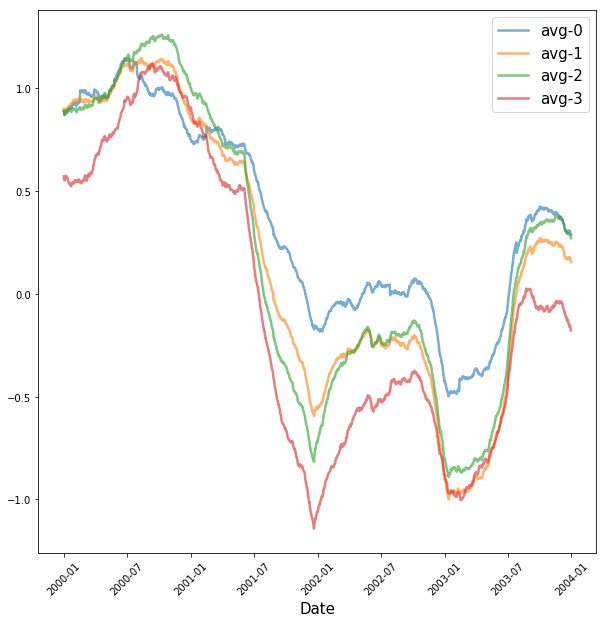

In [430]:
r_best = 100
start = "2000-01-01"
stop = "2003-12-31"

transform_data = smooth(standardize(detrend_weekly(avgs_series)), r_best)
plot_series(transform_data, start, stop)

In [431]:
best_column = 'avg-2'
best_series = avgs_series[best_column]

__A13.__ _(5 pts)_ While smoothing helped us to visually observe some candidate big events on the time series, it will actually make it more difficult to pin down exactly where these shifts happended, and hence provide clues as to _why_ they happened. This is because one means we have for assessing a big 'drop', or, more generally a 'shift', is by looking at outlier _differences_ in the time series values. 

So, write a new function called `diff(ts)` that calculates _single-step, backward differences_ of `ts` and outputs them as another timeseries dataframe. In particular, this function should subtract the $t-1^\text{st}$ series values from the $t^\text{th}$. 

When this is done, apply your code in the following order to `best_series`:

1. `detrend_weekly()`
- `standardize()`
- `diff()`

Then, `.sort(by = best_column)` the result and store it as `diffs`. Finally, print the `.head()` and `.tail()` of the result. Considering the change of sign (negative for `.head()` and positive for `.tail()`), do you recognize any dates that might correspond to sentiment-charged news reporting major geopolitical events?  In the response box below, discuss any of these specific dates and possibilities.

__Important__: the output of `diff()` should always be one row smaller than its input, since the first (`0`-index) row has none previous to subtract. 

**_Response._**

As discussed previously, the steepest drop in happiness is happens after 9/11/2001 for obvious reasons.

A Wikipedia search of current events in March 2006 doesn't reveal anything notable that month that might correlate to the steep increase in happiness on the 29th.

In [432]:
def diff(ts):
    
    diff_series = ts.iloc[1:].copy()
    
    for i in range(diff_series.shape[0]):
        diff_series.iloc[i] = ts.iloc[i+1] - ts.iloc[i]
    
    return diff_series

In [452]:
diff_series = diff(standardize(detrend_weekly(best_series)))
diffs = pd.Series.sort_values(diff_series)

print(diffs.head(), '\n\n', diffs.tail())

2001-09-12   -6.073068
1999-04-14   -3.633041
1996-07-24   -3.361314
1988-08-23   -3.284781
1995-07-12   -3.278251
Name: avg-2, dtype: float64 

 1995-05-14    3.636730
1991-11-10    3.718243
1992-08-01    3.996289
1997-01-07    4.210212
2006-03-29    4.295275
Name: avg-2, dtype: float64


__A14.__ _(10 pts)_ To observe candidate events, modify your original `plot_series` function into a new one:

- `plot_series_top_diffs(ts, start, stop, ylabel, top = 5, legend = True)` 

so as to additionally visualize the `top` (most extreme) values determined from an application of `diff()` to `ts`, i.e., the `.head(top)` and `.tail(top)` from the sorted output of `diff()`.  

Beyond `plot_series()`, this function should, intuitively, exhibit 'points on a line' over a specified `start`/`stop` range. As in part __A12__, your final product should exhibit the series with transformations in the following order:

1. `detrend_weekly()`
- `standardize()`
- `smooth()`

__Important:__ `diff()` should only be applied to _un-smoothed_ data. In other words, for the `2*top` points we'd like to retrieve from `diff` the order of transformations should be:

1. `detrend_weekly()`
- `standardize()`
- `diff()`

So, be sure to pass only _detrended_, _standardized_ series to the `plot_series_top_diffs` function. Application of `diff()` and `smooth()` should then be applied to the passed `ts` to identify the `top` times along the `smooth()`'d values for plotting.

Also, as with parts __A10__&mdash;__A13__, your final code should be exhibited over the range

- `start = "2000-01-01"`
- `stop = "2003-12-31"`

but now just in application to the `best_series` values.

When this is complete, exhibit the function's output setting `top = 5`. Then, discuss the locations of these points below in the context of the potential events you identified in __A13__. Is the analysis all consistent?

**_Response._**

Clearly, something ain't right. I don't know how to limit my scatter plot range to start:stop. Despite this, the head and tail scatter points are kind of visible as points on the series line plot. As discussed, a head (unhappy) point lies around 9/11.

In [459]:
#my smooth() function above only works for 2-dimensional dataframes.
#smooth_series() is for 1-dimensional series

def smooth_series(ts, r):
    
    smooth_ts = ts.copy()
    
    for i in range(ts.shape[0]):
        if i < r:
            smooth_ts.iloc[i] = np.mean(ts.iloc[0:(i+r)])
        elif i+r > ts.shape[0]:
            smooth_ts.iloc[i] = np.mean(ts.iloc[i-r:])
        else:
            smooth_ts.iloc[i] = np.mean(ts.iloc[i-r:(i+r)])
                
    return smooth_ts

In [500]:
def plot_series_top_diffs(ts, start, stop, ylabel, top=5, legend=True):
    
    #create figure & set dimensions
    hist_fig = plt.figure(figsize = (10,10))
    
    #apply diff(), smooth_series()
    diffs = diff(ts)
    smooth_diffs = smooth_series(diffs, r=100)
    
    #sort the smoothed diffs series
    sorted_diffs = pd.Series.sort_values(smooth_diffs)
    
    #get the head and tail of the sorted series
    head = sorted_diffs.head(top)
    tail = sorted_diffs.tail(top)
    
    
    print(head, tail)
    
    #plot the head and tail
    _ = plt.scatter(head.index,
                    head,
                    s=5, alpha = 0.8,
                 label = 'Head',)
    _ = plt.scatter(tail.index,
                    tail,
                    s=5, alpha = 0.8,
                 label = 'Tail')
    
    #plot the line
    _ = plt.plot(smooth_series(ts, r=100).loc[start:stop], alpha = 0.6, linewidth = 2.5)
    
    #modify plot properties
    plt.tick_params(labelsize = 10)
    _ = plt.ylabel(ylabel, fontsize = 15)
    _ = plt.xlabel("Date", fontsize = 15)
    _ = plt.xticks(rotation = 45)
    if legend:
        _ = plt.legend(fontsize = 15)

1990-10-14   -0.031180
2001-07-02   -0.028038
1990-10-11   -0.025381
2001-06-05   -0.025335
2001-06-06   -0.025218
Name: avg-2, dtype: float64 2003-07-08    0.024321
2003-07-17    0.024798
2003-07-01    0.026635
2003-07-10    0.027842
2003-07-15    0.028083
Name: avg-2, dtype: float64


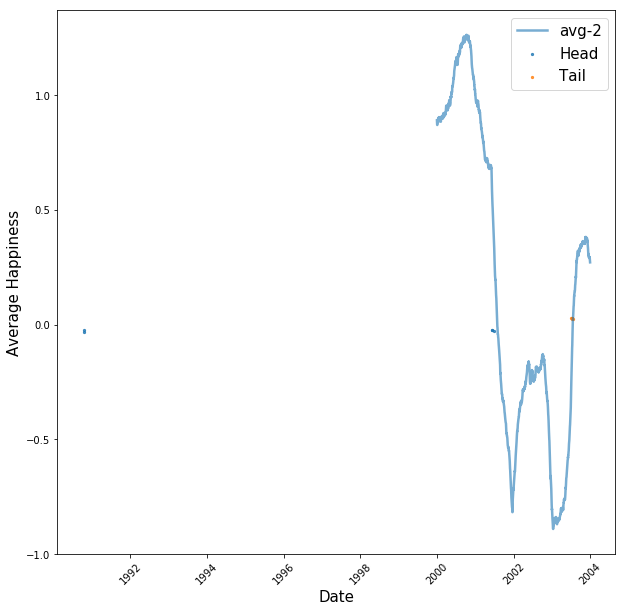

In [501]:
start = "2000-01-01"
stop = "2003-12-31"
ylabel = "Average Happiness"

new_ts = standardize(detrend_weekly(best_series))

plot_series_top_diffs(new_ts, start, stop, ylabel, top=5, legend=True)